<a href="https://colab.research.google.com/github/asiri000/N.G.W.M.A.R.B.Wijethilaka/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive
print(cv.__version__)

drive.mount('/content/gdrive',force_remount=True)

4.6.0
Mounted at /content/gdrive


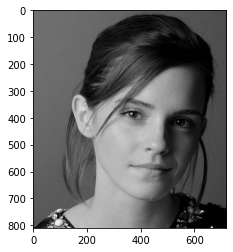

In [ ]:

im = cv.imread('/content/gdrive/MyDrive/EN5204_Assignment_image/emma_gray.jpg',cv.IMREAD_COLOR)
assert im is not None
imrgb=cv.cvtColor(im,cv.COLOR_BGR2RGB)
plt.imshow(imrgb)
plt.show()

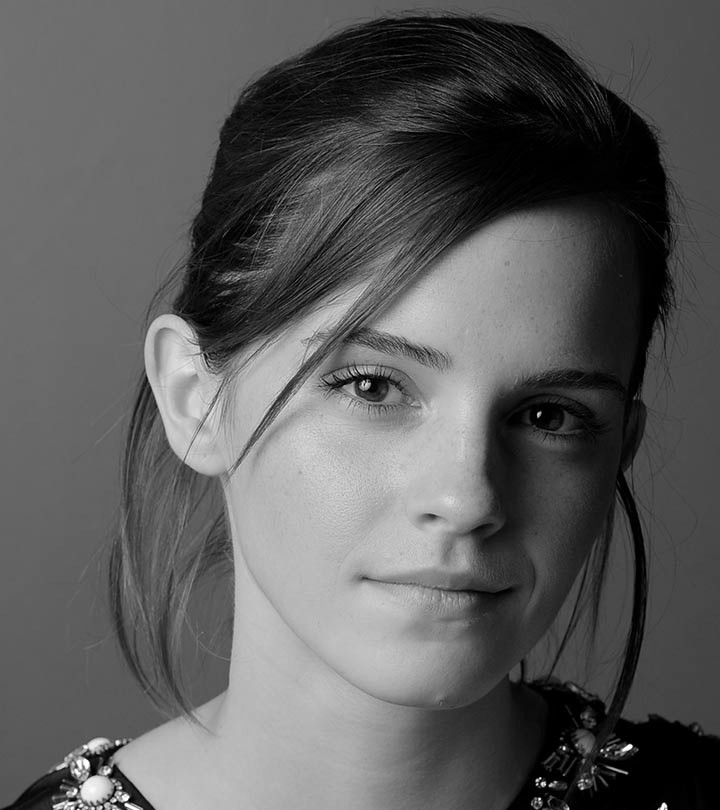

In [5]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
 
img = cv2.imread('/content/gdrive/MyDrive/EN5204_Assignment_image/emma_gray.jpg')
cv2_imshow(img)

for gamma in [0.1, 0.5, 1.2, 2.2]:
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    cv2.imwrite('gamma_transformed_'+str(gamma)+'.jpg', gamma_corrected)

In [ ]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c=np.array([(50,50),(50,100),(150,255),(150,150)]) #array

t1=np.linspace(0,c[0,1], c[0,0]-0).astype('uint8') 
print(len(t1))
t2=np.linspace(c[0,1],c[1,1], c[1,0]-c[0,0]).astype('uint8')
print(len(t2))
t3=np.linspace(c[1,1],c[2,1], c[2,0]-c[1,0]).astype('uint8')
print(len(t3))
t4=np.linspace(c[2,1],c[3,1], c[3,0]-c[2,0]).astype('uint8')
print(len(t4))
t5=np.linspace(c[3,1],255, 255- c[3,0]).astype('uint8')
print(len(t5))

transform_1=np.concatenate((t1,t2,t3,t4),axis=0).astype('uint8')
transform_2=np.concatenate((transform_1,t5),axis=0).astype('uint8')
print(len(transform_2))

fig ,ax =plt.subplots()
ax.plot(transform_2)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$f(\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_orig=cv.imread('/content/gdrive/MyDrive/EN5204_Assignment_image/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed =cv.LUT(img_orig ,transform_all )
cv.imshow("Image",image_transformed)
cv.waitKey (0)
cv.destroyAllWindows( )



#plt.imshow(img_orig)
#plt.show()
#plt.imshow(image_t)
#plt.show()

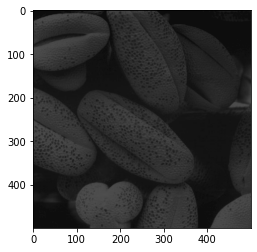

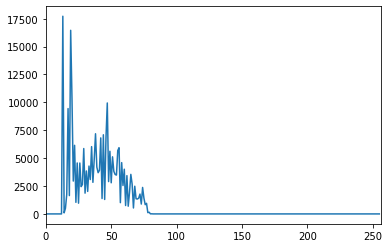

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('../content/gdrive/MyDrive/EN5204_Assignment_image/shells.png',cv.IMREAD_COLOR)
hist=cv.calcHist([img],[0],None,[256],[0,256])
plt.imshow(img)
plt.show()
plt.plot(hist) 
plt.xlim([0,256])
plt.show()


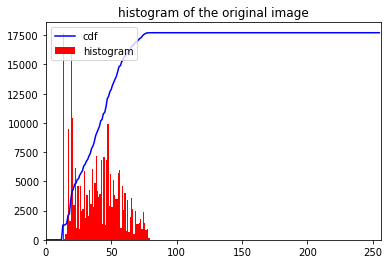

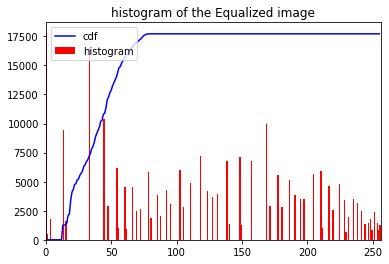

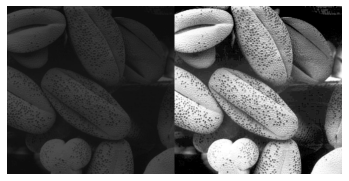

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('../content/gdrive/MyDrive/EN5204_Assignment_image/shells.png',cv.IMREAD_GRAYSCALE)
hist, bins = np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized, color ='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('histogram of the original image')
plt.show()

equ=cv.equalizeHist(img)

hist, bins = np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized, color ='b')
plt.hist(equ.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.title('histogram of the Equalized image')
plt.show()

res =np.hstack((img,equ))
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.imshow(res, cmap='gray')

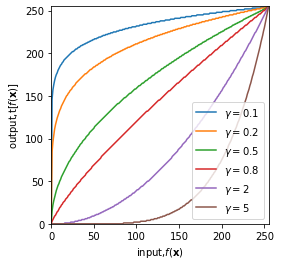

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

fig,ax =plt.subplots()
gamma =[0.1,0.2,0.5,0.8,2,5]
for g in gamma:
  table =np.array([(i/255.0)**(g)*255.0 for i in np.arange(0,256)]).astype('uint8')
  ax.plot(table,label=r'$\gamma={g}$'.format(g=g))
ax.legend(loc='best')
ax.set_xlim(0,255)  
ax.set_ylim(0,255)  
ax.set_aspect('equal')
ax.set_xlabel(r'input,$f(\mathbf{x})$')
ax.set_ylabel('output,$\mathrm{t}[f(\mathbf{x})]$')
plt.savefig('transform.png')
plt.show()


In [ ]:
import cv2 as cv
import numpy as np

gamma=4
f=cv.imread('../content/gdrive/MyDrive/EN5204_Assignment_image/highlights_and_shadows.jpg',cv.IMREAD_GRAYSCALE)/255.

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',f)
cv.waitkey(0)
g=f**gamma

cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

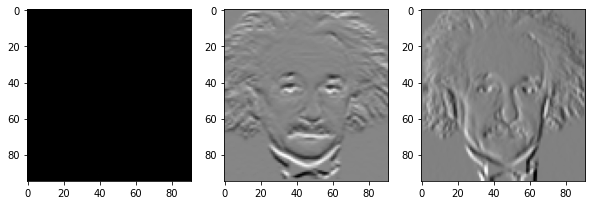

In [ ]:
#sobel filter
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('/content/gdrive/MyDrive/EN5204_Assignment_image/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_4)
assert im is not None

im = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX) # Converting to a float image in [0,1]
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
result_v = cv.filter2D(im, -1, sobel_v)
result_v = cv.normalize(result_v, result_v, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)
result_h = cv.filter2D(im, -1, sobel_h)
result_h = cv.normalize(result_h, result_h, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)

fig, ax = plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(result_h, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
